# STROKE PREDICTION DATASET

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

This dataset is retrieved from https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

The dataset consist of 12 columns with one unique identifier 'id' and one predictive value 'stroke'. The description for other columns are as follows:
1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# IMPORTING PACKAGES AND READING DATASET

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

In [17]:
data=pd.read_csv('../data/healthcare-dataset-stroke-data1.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


SETTING 'id' AS THE INDEX VALUE

In [18]:
data.set_index('id',inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [19]:
data.shape

(5110, 11)

Current dataframe consist of 11 columns with 5110 rows

# RESIZING THE DATA AND HANDLING NULL VALUE

Get names of indexes for which column age has value less than 25 or more than 60 or smoking_status=Unknown

Delete these row indexes from dataFrame 

To minimize the rows number

In [20]:
row=data[(data['age'] < 30)  | (data['age'] >70 ) | (data['smoking_status'] == 'Unknown') ].index
data.drop(row , inplace=True)


Dropping row with null value

In [21]:
data.isnull().sum()

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  87
smoking_status        0
stroke                0
dtype: int64

In [22]:
data=data.dropna()

In [23]:
data.shape

(2241, 11)

In [24]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

# DATA VISUALIZATION

Change the datatypes of 'age' from float to integer

In [25]:
data.age = data.age.astype(int)
data['age'].dtypes

dtype('int32')

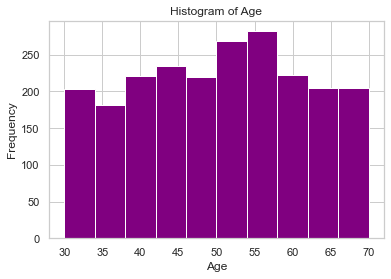

In [26]:
data['age'].plot(kind='hist', bins=10, color='purple')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

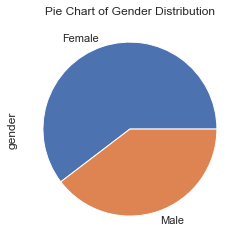

In [27]:
data['gender'].value_counts().plot(kind='pie')
plt.title('Pie Chart of Gender Distribution')
plt.show()

In [28]:
data.stroke=data['stroke'].replace({0: "No Stroke", 1: "Have Stroke"})
data['stroke'].value_counts()

No Stroke      2152
Have Stroke      89
Name: stroke, dtype: int64

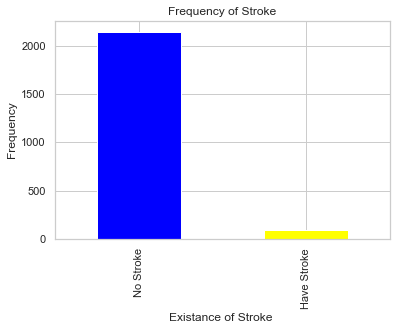

In [29]:
data['stroke'].value_counts().plot(kind='bar', color=['blue','yellow'])
plt.title('Frequency of Stroke')
plt.xlabel('Existance of Stroke ')
plt.ylabel('Frequency')
plt.show()

CROSSTAB OF THE COLUMN VALUES

In [30]:
data[['stroke','smoking_status']].value_counts()

stroke       smoking_status 
No Stroke    never smoked       1102
             formerly smoked     531
             smokes              519
Have Stroke  formerly smoked      31
             never smoked         30
             smokes               28
dtype: int64

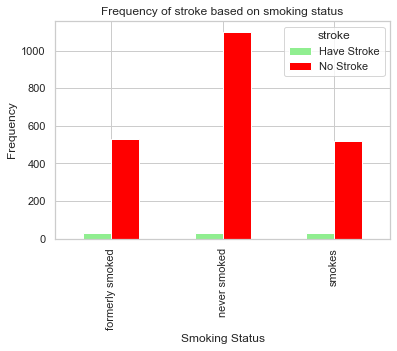

In [31]:
pd.crosstab(data.smoking_status, data.stroke).plot(kind='bar', color=['lightgreen','red'])
plt.title("Frequency of stroke based on smoking status")
plt.xlabel('Smoking Status')
plt.ylabel('Frequency')
plt.show()

In [32]:
data.heart_disease=data['heart_disease'].replace({0: "No Heart Disease", 1: "Have Heart Disease"})
data[['heart_disease','stroke']].value_counts()

heart_disease       stroke     
No Heart Disease    No Stroke      2068
Have Heart Disease  No Stroke        84
No Heart Disease    Have Stroke      72
Have Heart Disease  Have Stroke      17
dtype: int64

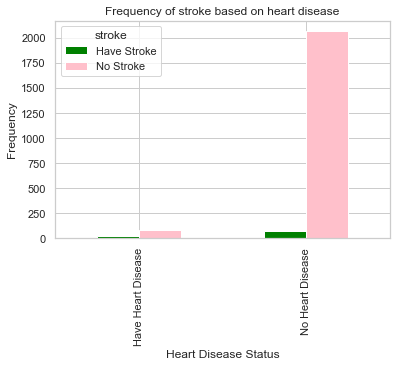

In [33]:
pd.crosstab(data.heart_disease, data.stroke).plot(kind='bar', color=['green', 'pink'])
plt.title("Frequency of stroke based on heart disease")
plt.xlabel('Heart Disease Status')
plt.ylabel('Frequency')
plt.show()

In [34]:
data.hypertension=data['hypertension'].replace({0: "No Hypertension", 1: "Have Hypertension"})
data[['hypertension','stroke']].value_counts()

hypertension       stroke     
No Hypertension    No Stroke      1915
Have Hypertension  No Stroke       237
No Hypertension    Have Stroke      63
Have Hypertension  Have Stroke      26
dtype: int64

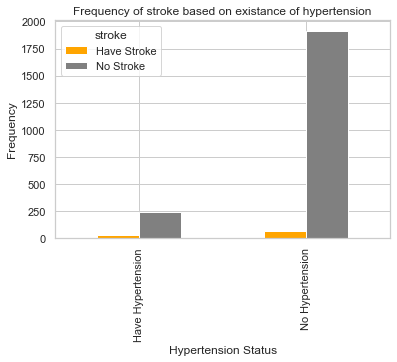

In [35]:
pd.crosstab(data.hypertension,data.stroke).plot(kind='bar', color=['orange', 'grey'])
plt.title("Frequency of stroke based on existance of hypertension")
plt.xlabel('Hypertension Status')
plt.ylabel('Frequency')
plt.show()

In [40]:
data.sort_values('age').tail(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
47208,Female,70,No Hypertension,No Heart Disease,Yes,Self-employed,Rural,62.67,27.7,never smoked,No Stroke
11792,Female,70,No Hypertension,No Heart Disease,Yes,Private,Urban,90.49,28.9,formerly smoked,No Stroke
15873,Male,70,No Hypertension,No Heart Disease,Yes,Private,Rural,72.56,30.4,formerly smoked,No Stroke
56594,Female,70,No Hypertension,No Heart Disease,Yes,Private,Urban,77.77,33.8,smokes,No Stroke
3512,Female,70,Have Hypertension,No Heart Disease,Yes,Self-employed,Urban,89.13,34.2,formerly smoked,Have Stroke


In [39]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67,No Hypertension,Have Heart Disease,Yes,Private,Urban,228.69,36.6,formerly smoked,Have Stroke
60182,Female,49,No Hypertension,No Heart Disease,Yes,Private,Urban,171.23,34.4,smokes,Have Stroke
10434,Female,69,No Hypertension,No Heart Disease,No,Private,Urban,94.39,22.8,never smoked,Have Stroke
12095,Female,61,No Hypertension,Have Heart Disease,Yes,Govt_job,Rural,120.46,36.8,smokes,Have Stroke
12175,Female,54,No Hypertension,No Heart Disease,Yes,Private,Urban,104.51,27.3,smokes,Have Stroke


CREATING NEW COLUMN, 'bmi_reading' FROM 'bmi'

In [23]:
values = [
    (data['bmi'] < 18.5),
    (data['bmi'] <= 24.9),
    (data['bmi'] <= 29.9),
    (data['bmi'] > 29.9)
]

reading = ['underweight' , 'normal', 'overweight', 'obese']

data['bmi_reading']=np.select(values,reading)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_reading
id,,,,,,,,,,,,
9046,Male,67,No Hypertension,Have Heart Disease,Yes,Private,Urban,228.69,36.6,formerly smoked,Have Stroke,obese
60182,Female,49,No Hypertension,No Heart Disease,Yes,Private,Urban,171.23,34.4,smokes,Have Stroke,obese
10434,Female,69,No Hypertension,No Heart Disease,No,Private,Urban,94.39,22.8,never smoked,Have Stroke,normal
12095,Female,61,No Hypertension,Have Heart Disease,Yes,Govt_job,Rural,120.46,36.8,smokes,Have Stroke,obese
12175,Female,54,No Hypertension,No Heart Disease,Yes,Private,Urban,104.51,27.3,smokes,Have Stroke,overweight


GROUPBY USING 'stroke' VALUE

In [44]:
data.groupby('stroke').mean()

,age,avg_glucose_level,bmi
stroke,,,
Have Stroke,58.101124,135.408652,32.719101
No Stroke,49.522770,106.623443,31.366729


Changing the values in Residence_type columns ("Urban":"U" , "Rural" : "R") by applying the dictionary

In [24]:
data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [25]:
def residence_letter(residence):
    res_dict = {"Urban":"U" , "Rural" : "R"}
    try:
        return res_dict[residence]
    except KeyError:
        return 'The residence type is not available'

In [26]:
residence_letter("Urban")

'U'

In [27]:
residence_letter("Town")

'The residence type is not available'

In [29]:
data['Residence_type'] = data['Residence_type'].apply(residence_letter)

In [30]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_reading
id,,,,,,,,,,,,
9046,Male,67,No Hypertension,Have Heart Disease,Yes,Private,The residence type is not available,228.69,36.6,formerly smoked,Have Stroke,obese
60182,Female,49,No Hypertension,No Heart Disease,Yes,Private,The residence type is not available,171.23,34.4,smokes,Have Stroke,obese
10434,Female,69,No Hypertension,No Heart Disease,No,Private,The residence type is not available,94.39,22.8,never smoked,Have Stroke,normal
12095,Female,61,No Hypertension,Have Heart Disease,Yes,Govt_job,The residence type is not available,120.46,36.8,smokes,Have Stroke,obese
12175,Female,54,No Hypertension,No Heart Disease,Yes,Private,The residence type is not available,104.51,27.3,smokes,Have Stroke,overweight


USER INPUT FOR DIABETES TRACKING

In [24]:
def diabetes_statement():
    print("This is a function to check risk of getting diabetes.")
    glucose_reading=float(input("Enter your fasting blood glucose reading (mg/dl): "))
    
    if (glucose_reading < 100):
        print("Your blood glucose level is normal")
    elif(glucose_reading <= 125):
        print("You are at risk of pre-diabetes!!")
        print("You should control your food intake!!")
    else:
        print("Warning!! You're in high risk for diabetes mellitus!!")
        print("Please consult your doctor")

In [25]:
diabetes_statement()

This is a function to check risk of getting diabetes.
Enter your fasting blood glucose reading (mg/dl): 78
Your blood glucose level is normal


USER INPUT FOR BMI CALCULATOR

In [32]:
def BMI_Calculator():
    weight=float(input("Enter your weight (kg) : "))
    height=float(input("Enter your height (m) : "))
            
    BMI=weight/(height*height)
    
    if (BMI<18.5):
        bmi_reading='underweight'
        print("Your current BMI is",bmi_reading)
    elif (BMI<=24.9):
        bmi_reading='normal'
        print("Your current BMI is in ",bmi_reading,"range")
    elif (BMI<=29.9):
        bmi_reading='overweight'
        print("Your current BMI is range of",bmi_reading)
    else:
        bmi_reading='obese'
        print("Your current BMI is range of",bmi_reading)

In [33]:
BMI_Calculator()

Enter your weight (kg) : 53
Enter your height (m) : 1.55
Your current BMI is in  normal range
